# Multi-lingual Word Embeddings 

## Methodische Seite: 

* Folgende Arbeit setzt mit dem Konzept und Mehtode zu sogenannten Bi-lingualen-bzw. Multilingualen Word-Embeddings auseinander, die ermöglicht, Wortvektoren sprachübergreifend anzuwenden, während die (bisherige) monolinguale Word-Embeddings auf einsprachige Modellen fokussiert haben.  

* Forschungsüberblick 

    * Sentence-Skip-Gramm (BiSkip): Luong et al. (2015) 
    -> the same cross-lingual regularization terms as Trans-gram[1] 
    
    * Bilingual-Mapping: Mikolov et al. (2013b), Conneau et al. (2018a)[2] 
    -> Embeddings in 2 Sprachen einzeln lernen. 
    -> a linear transformation outperforms non-linear transformation learned 
        via a feedforward neural network

* Anwendungen von multilingualen Embeddings: 
    - (Automatische) Maschienelle Übersetzung
    - Multilinguale NER [3]

## Hervorgehensweise: 

Zur Repräsentation der deutschen und englischen Wörtern werden zunächst die jeweiligen vortrainierten Datensätze benötigt. 
In dieser Arbeit werden ConceptNet multilingual embeddings[4] für Deutsch und Englisch und für Deutsch und Französisch verwendet. 

In [1]:
# Importieren der Packages 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix
import codecs
import numpy as np
import os
import pandas as pd
from collections import Counter

In [2]:
"""
Eine einfache Funktion zum Aufruf und Laden des Datasets.

Args
----
path: Verzeichnis zum Trainingsdaten
dimension: Dimensionen der Wortvektoren. 
entweder zu skippen oder not the header
vocab: Laden der Wörter,die sich nur im Wörterbuch befinden. 

Rückgabe
-----
Wortvektoren
"""

def load_embeddings(path, dimension,skip_header=True,vocab=None):
    
    with codecs.open(path,"r",encoding="utf-8") as f:
        if skip_header==True:
            info = f.readline()
            print("{} vectors of dimension {}".format(*info.split()))
        vectors = {}
        for cnt,line in enumerate(f):
            elems = line.split()
            word = " ".join(elems[:-dimension])
            if vocab is not None and word in vocab:
                vectors[" ".join(elems[:-dimension])] =  np.array(elems[-dimension:]).astype(np.float)
            if vocab is None:
                vectors[" ".join(elems[:-dimension])] =  np.array(elems[-dimension:]).astype(np.float)
        print("Loaded {} vectors".format(len(vectors)))
        return vectors
    

In [4]:
"""
Eine Funktion zur Umwanldung der Vektoren in Arrays 
"""
 
def emb2numpy(embeddings_dico):
    keys = []
    values = []
    for k in embeddings_dico:
        keys.append(k)
        values.append(embeddings_dico[k])
    return keys,np.array(values)

In [5]:
import sys
sys.path.append('..')
from IPython.display import Image
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Einige englische und deutsche Wörter zur Auswahl
english_words = ["mother","father","child","boy","police","come"]
german_words = ["vater", "polizei", "mutter", "junge","kind" "kommen"]

In [37]:
# Laden der Trainingsdaten, dabei werden die Wörter zunächst geprüft, ob diese im Triningsdaten befinden. 

en_emb = load_embeddings(path="./concept_net_1706.300.en", dimension=300,skip_header=False,vocab=english_words)
de_emb = load_embeddings(path="./concept_net_1706.300.de", dimension=300,skip_header=False,vocab=german_words)

Loaded 6 vectors
Loaded 4 vectors


In [38]:
# Arraysieren der Vektoren 
words_en,V_en = emb2numpy(en_emb)
words_de,V_de = emb2numpy(de_emb)

In [39]:
# Zusammenfügen beider Arrays
vectors = np.concatenate((V_en,V_de))
all_words  = words_en+words_de

In [40]:
# Zur Projektieung werden die mehrdimensionalen Arrays auf zweidimensionalen reduziert. 

V_umap = UMAP(n_neighbors=3,min_dist=0.6).fit_transform(vectors)


C:\Users\Yohan\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


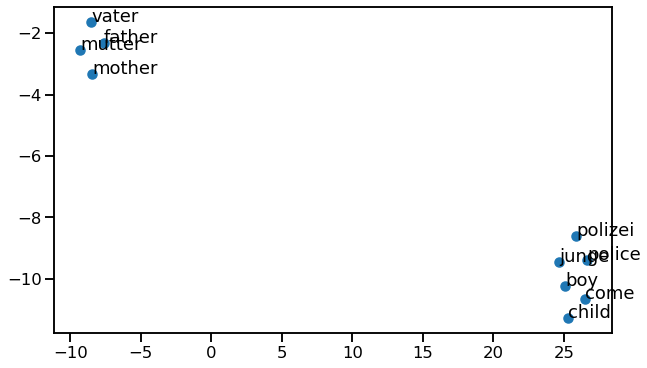

In [41]:
# Visualisierung von Wörtern. 
sns.set_context("talk")

fig= plt.figure(figsize=(10,6))

plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(all_words):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

### Word Embeddings mit 3 Sprachen

In [63]:
# Einige englische und deutsche französische Wörter zur Auswahl

english_words2 = ["mother","father","boy","king","queen"]
german_words = ["vater", "könig","königin" ,"mutter", "junge"]
french_words = ["roi", "reine","mère", "père", "garçon"]

In [64]:
# Laden der Trainingsdaten

en_emb = load_embeddings(path="./concept_net_1706.300.en", dimension=300,skip_header=False,vocab=english_words2)
de_emb = load_embeddings(path="./concept_net_1706.300.de", dimension=300,skip_header=False,vocab=german_words)
fr_emb = load_embeddings(path="./concept_net_1706.300.fr", dimension=300,skip_header=False,vocab=french_words)

Loaded 5 vectors
Loaded 5 vectors
Loaded 5 vectors


In [65]:
# Arraysieren der Vektoren 

words_en,V_en = emb2numpy(en_emb)
words_de,V_de = emb2numpy(de_emb)
words_fr,V_fr = emb2numpy(fr_emb)

In [67]:
# Zusammenfägen dreier Arrays 

vectors_new = np.concatenate((V_en,V_de,V_fr))
all_words_new = words_en+words_de+words_fr

In [68]:
# Reduzierung der Arraysdimensierung 

V_umap_new = UMAP(n_neighbors=3,min_dist=0.6).fit_transform(vectors_new)

C:\Users\Yohan\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components


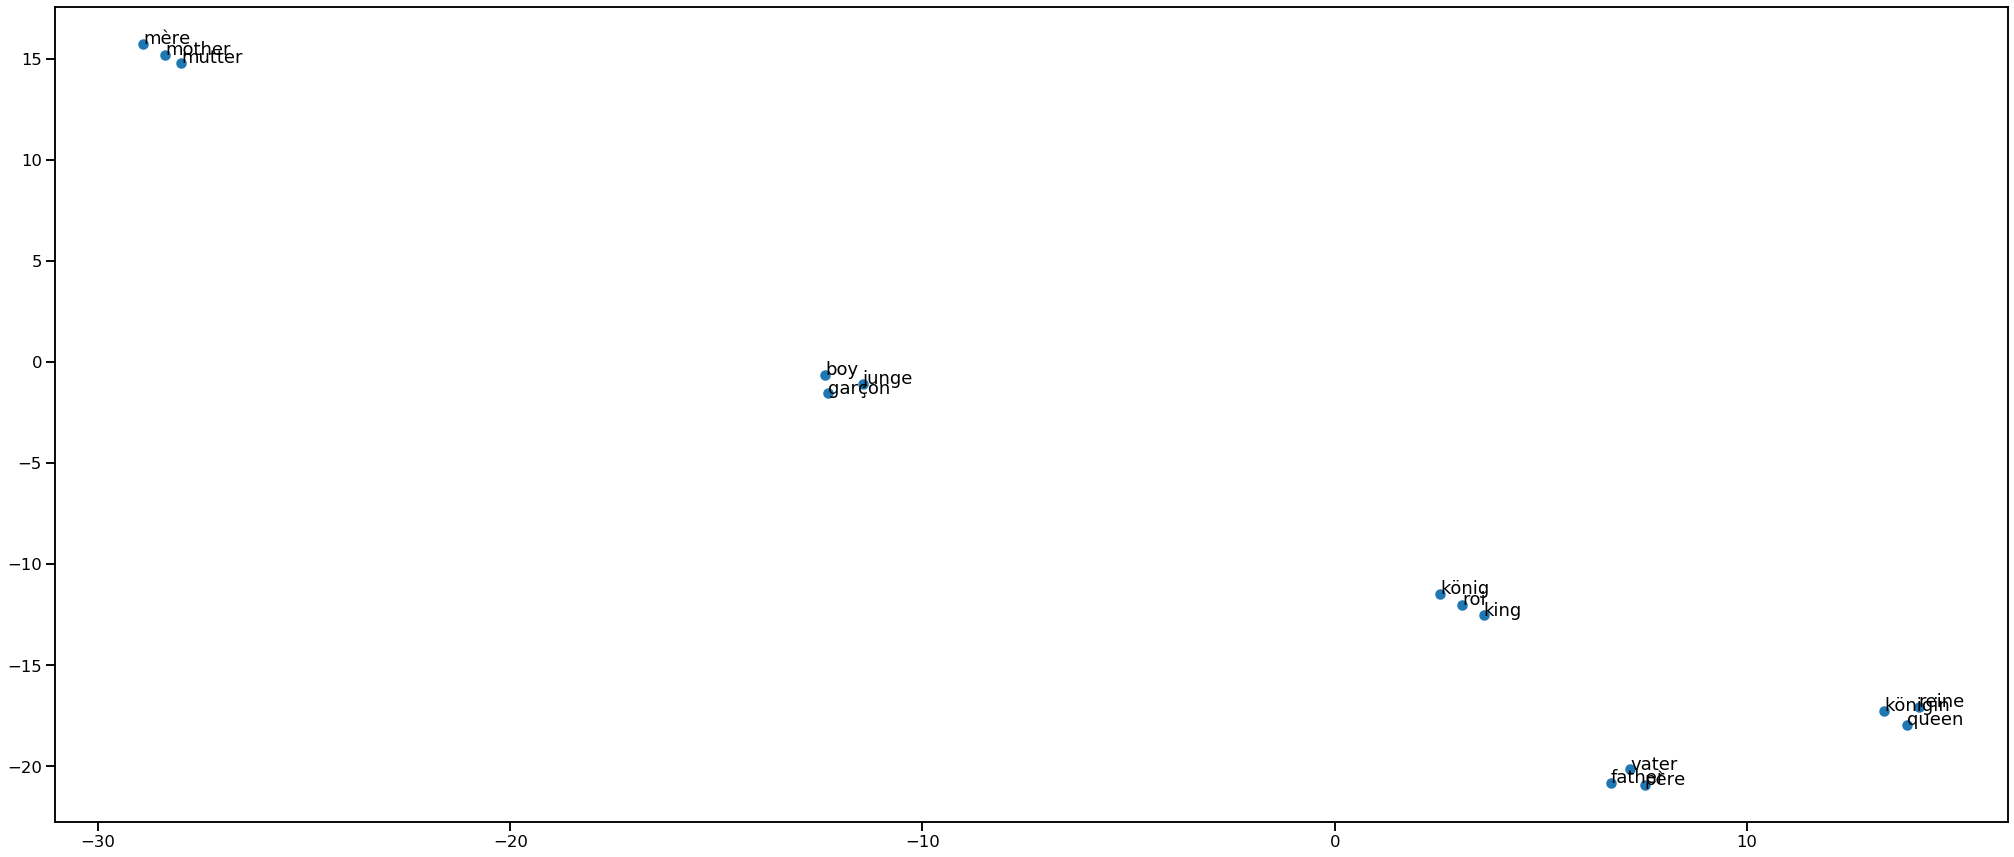

In [72]:
# Visualisierung von Wörtern. 

sns.set_context("talk")

fig= plt.figure(figsize=(35,15))

plt.scatter(V_umap_new[:, 0], V_umap_new[:, 1])
for i, word in enumerate(all_words_new):
    plt.annotate(word, xy=(V_umap_new[i, 0], V_umap_new[i, 1]))
plt.show()

## Fazit 

Das Ergebnis ist durchaus zufriedenstellend. 
Es ist zu beobachten, dass Wörter aus den unterschiedlichen Sprachenen aber selbe semantische Bedeutungen haben, nah beieinander im Vekotrraum sind. 
Dabei ist anzumerken, dass das Ergebnis mit dem Schwierigkeitsgrad der Testwörter in Zusammenhang steht. Daher soll es überprüft werden, den Vorgang mit den Wörtern mit der komplexen Bedeutung zu testen, wobei das Ergebnis dem Inhalt der Datasets  zurundeliegt.
In Kontext auf DH wäre sicherlich interessant, diese Mehtode mit dem Forschungsdaten (z.B. Dataset bzw. Pararellekorpus mit der historischen-semantik) anzupassen und vervollständigen.  

# Referenzen 

[1.Pham, H., Luong, M.-T., & Manning, C. D. (2015). Learning Distributed Representations for Multilingual Text Sequences. Workshop on Vector Modeling for NLP, 88–94](https://www.aclweb.org/anthology/W15-1512.pdf)

[2. Conneau, A., Lample, G., Ranzato, M., Denoyer, L., & Jégou, H. (2018a). Word Translation
Without Parallel Data. In Proceedings of ICLR 2018.](https://arxiv.org/abs/1710.04087)


[3. 19 entities for 104 languages: A new era of NER with the DeepPavlov multilingual BERT](https://towardsdatascience.com/19-entities-for-104-languages-a-new-era-of-ner-with-the-deeppavlov-multilingual-bert-1bfa6d413ea6)

[4. Conceptnet-Numberbatch](https://libraries.io/github/commonsense/conceptnet-numberbatch)

